# Proyek Analisis Data: Bike sharing using dahsboard streamlit
- **Nama:** Dewi Yuliana
- **Email:** dewiyulianaa938@gmail.com/a547xbm124@devacademy.id
- **ID Dicoding:** a547xbm124

## Menentukan Pertanyaan Bisnis

- Bagaimana Pengaruh musim terhadap jumlah penyewaaan sepeda?
- Pada jam berapa penyewaan sepeda paling tinggi dan paling rendah dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### membaca dataset day.csv

In [3]:
day_df = pd.read_csv("https://raw.githubusercontent.com/dewiyulianaa/Analyze-Bike-Sharing-dataset-using-streamlit-dashboard/refs/heads/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### membaca dataset hour.csv

In [4]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/dewiyulianaa/Analyze-Bike-Sharing-dataset-using-streamlit-dashboard/refs/heads/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset `hour.csv` dan `day.csv` memiliki informasi yang serupa tetapi dalam skala waktu yang berbeda, di mana `day.csv` menyajikan data harian, sedangkan `hour.csv` memberikan granularitas lebih tinggi dengan data per jam. Ini memungkinkan analisis tren berdasarkan waktu yang lebih mendetail.

### Assessing Data

### Menilai Tabel `Day_df`


In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
day_df.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


In [8]:
day_df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
print("Jumlah duplikasi:", day_df.duplicated().sum())

Jumlah duplikasi: 0


In [10]:
day_df.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


## Menilai Tabel `hour_df`

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [13]:
print("Jumlah duplikasi:", hour_df.duplicated().sum())

Jumlah duplikasi: 0


In [14]:
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


### Cleaning Data

In [15]:
day_df.duplicated().sum()

0

In [16]:
hour_df.duplicated().sum()

0

In [17]:
day_df.drop_duplicates(inplace=True)

In [18]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [19]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Missing Values

In [20]:
print("\nMissing Values di Data Harian:")
print(day_df.isnull().sum())


Missing Values di Data Harian:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [21]:
print("\nMissing Values di Data Per Jam:")
print(hour_df.isnull().sum())


Missing Values di Data Per Jam:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- dataset tidak memiliki nilai yang hilang
- tidak ditemukan duplikat data

## Exploratory Data Analysis (EDA)

### Explore `day_df`#

In [22]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
24,25,2011-01-25,1,0,1,0,2,1,2,0.223478,0.234526,0.616957,0.129796,186,1799,1985
419,420,2012-02-24,1,1,2,0,5,1,2,0.407500,0.410971,0.737500,0.237567,246,3241,3487
554,555,2012-07-08,3,1,7,0,0,0,1,0.822500,0.790396,0.573750,0.125629,1203,3469,4672
67,68,2011-03-09,1,0,3,0,3,1,2,0.295833,0.286608,0.775417,0.220150,191,1700,1891
549,550,2012-07-03,3,1,7,0,2,1,1,0.780833,0.702650,0.492083,0.126237,1052,5608,6660


In [23]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [24]:
day_df.groupby(by="season").agg({
    "cnt": ["sum", "mean", "max", "min", "std"],
    "temp": ["mean", "max", "min", "std"],
    "windspeed": ["mean", "max", "min", "std"]
})

cnt                                            temp            \
            sum         mean   max   min          std      mean       max   
season                                                                      
1        471348  2604.132597  7836   431  1399.942119  0.297748  0.572500   
2        918589  4992.331522  8362   795  1695.977235  0.544405  0.808333   
3       1061129  5644.303191  8714  1115  1459.800381  0.706309  0.861667   
4        841613  4728.162921  8555    22  1699.615261  0.422906  0.657500   

                           windspeed                                
             min       std      mean       max       min       std  
season                                                              
1       0.059130  0.102735  0.214537  0.507463  0.045408  0.086439  
2       0.253043  0.122650  0.203507  0.388067  0.065929  0.071629  
3       0.469167  0.070848  0.172095  0.375617  0.064071  0.059526  
4       0.220833  0.107834  0.171995  0.422275  0.022392  0.081565

In [25]:
season_rentals = day_df.groupby("season")["cnt"].agg(["sum", "mean"]).sort_values(by="sum", ascending=False)
display(season_rentals)

,sum,mean
season,,
3,1061129,5644.303191
2,918589,4992.331522
4,841613,4728.162921
1,471348,2604.132597


#### Explore `hour_df`

In [26]:
hour_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
7646,7647,2011-11-20,4,0,11,5,0,0,0,2,0.42,0.4242,0.67,0.2836,0,4,4
10810,10811,2012-03-31,2,1,3,13,0,6,0,1,0.54,0.5152,0.60,0.1343,265,373,638
5093,5094,2011-08-05,3,0,8,3,0,5,1,1,0.64,0.5909,0.78,0.0896,0,6,6
11880,11881,2012-05-15,2,1,5,5,0,2,1,3,0.56,0.5303,0.94,0.2239,0,8,8
11163,11164,2012-04-15,2,1,4,8,0,0,0,1,0.52,0.5000,0.59,0.0000,33,64,97
10887,10888,2012-04-03,2,1,4,19,0,2,1,1,0.56,0.5303,0.26,0.1045,98,460,558
16419,16420,2012-11-21,4,1,11,21,0,3,1,1,0.36,0.3788,0.50,0.0000,8,97,105
16765,16766,2012-12-06,4,1,12,8,0,4,1,1,0.22,0.2121,0.51,0.2985,13,646,659
14486,14487,2012-08-31,3,1,8,19,0,5,1,1,0.80,0.7424,0.49,0.1343,91,361,452
11392,11393,2012-04-24,2,1,4,21,0,2,1,2,0.46,0.4545,0.28,0.1642,13,213,226


In [27]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [28]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [29]:
hour_df.groupby(by="hr").agg({
    "cnt": ["sum", "mean", "max", "min", "std"],
    "temp": ["mean", "max", "min", "std"],
    "windspeed": ["mean", "max", "min", "std"]
})


cnt                                       temp                        \
       sum        mean  max min         std      mean   max   min       std   
hr                                                                            
0    39130   53.898072  283   2   42.307910  0.467410  0.82  0.04  0.176550   
1    24164   33.375691  168   1   33.538727  0.459365  0.82  0.04  0.176498   
2    16352   22.869930  132   1   26.578642  0.454573  0.82  0.02  0.174807   
3     8174   11.727403   79   1   13.239190  0.453113  0.80  0.02  0.172499   
4     4428    6.352941   28   1    4.143818  0.446628  0.78  0.02  0.171371   
5    14261   19.889819   66   1   13.200765  0.436123  0.78  0.02  0.173457   
6    55132   76.044138  213   1   55.084348  0.432469  0.80  0.02  0.176661   
7   154171  212.064649  596   1  161.441936  0.439092  0.80  0.02  0.184456   
8   261001  359.011004  839   5  235.189285  0.454993  0.84  0.02  0.191244   
9   159438  219.309491  426  14   93.703458  0.476726  0.86  0.04  0.194848   
10  126257  173.668501  539   8  102.205413  0.500578  0.92  0.04  0.198130   
11  151320  208.143054  663  10  127.495536  0.522613  0.94  0.06  0.197818   
12  184414  253.315934  776   3  145.081134  0.540275  0.96  0.06  0.199211   
13  184919  253.661180  760  11  148.107657  0.554733  0.96  0.08  0.198297   
14  175652  240.949246  750  12  147.271574  0.565075  0.96  0.10  0.198187   
15  183149  251.233196  750   7  144.632541  0.568615  0.96  0.12  0.197608   
16  227748  311.983562  783  11  148.682618  0.564959  1.00  0.12  0.196834   
17  336860  461.452055  976  15  232.656611  0.554575  0.98  0.12  0.197380   
18  309772  425.510989  977  23  224.639304  0.541181  0.96  0.08  0.195319   
19  226789  311.523352  743  11  161.050359  0.524176  0.92  0.08  0.188999   
20  164550  226.030220  567  11  119.670164  0.508599  0.92  0.06  0.185639   
21  125445  172.314560  584   6   89.788893  0.495302  0.88  0.06  0.182269   
22   95612  131.335165  502   9   69.937782  0.484505  0.84  0.06  0.180696   
23   63941   87.831044  256   2   50.846889  0.475027  0.84  0.04  0.178362   

   windspeed                         
        mean     max  min       std  
hr                                   
0   0.161758  0.5821  0.0  0.109649  
1   0.158659  0.7761  0.0  0.112785  
2   0.154519  0.6866  0.0  0.113041  
3   0.150929  0.6866  0.0  0.110164  
4   0.155813  0.7164  0.0  0.110902  
5   0.150342  0.5522  0.0  0.104087  
6   0.157722  0.5821  0.0  0.108289  
7   0.163916  0.5224  0.0  0.105360  
8   0.176563  0.6119  0.0  0.116166  
9   0.191262  0.6567  0.0  0.125218  
10  0.202041  0.6418  0.0  0.123312  
11  0.207339  0.6418  0.0  0.123161  
12  0.216013  0.7164  0.0  0.135704  
13  0.221633  0.6866  0.0  0.130733  
14  0.232462  0.6567  0.0  0.126821  
15  0.235143  0.8060  0.0  0.134285  
16  0.237317  0.6418  0.0  0.123149  
17  0.233371  0.8507  0.0  0.129800  
18  0.224684  0.8507  0.0  0.121120  
19  0.210148  0.6418  0.0  0.116689  
20  0.195222  0.6418  0.0  0.114262  
21  0.180871  0.8060  0.0  0.116718  
22  0.174640  0.6567  0.0  0.116865  
23  0.164802  0.6866  0.0  0.110045

In [30]:
hourly_rentals = hour_df.groupby("hr")["cnt"].agg(["sum", "mean"]).sort_values(by="sum", ascending=False)
display(hourly_rentals)

,sum,mean
hr,,
17,336860,461.452055
18,309772,425.510989
8,261001,359.011004
16,227748,311.983562
19,226789,311.523352
13,184919,253.661180
12,184414,253.315934
15,183149,251.233196
14,175652,240.949246


**Insight:**
- Penyewaan sepeda memiliki pola musiman yang jelas
- Tren harian menunjukkan bahwa penyewaan sepeda meningkat pada hari kerja dibandingkan akhir pekan

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana Pengaruh musim terhadap jumlah penyewaaan sepeda?

<ipython-input-31-a1b6482c9e6e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_df["season"], y=day_df["cnt"], palette="coolwarm", estimator=sum)


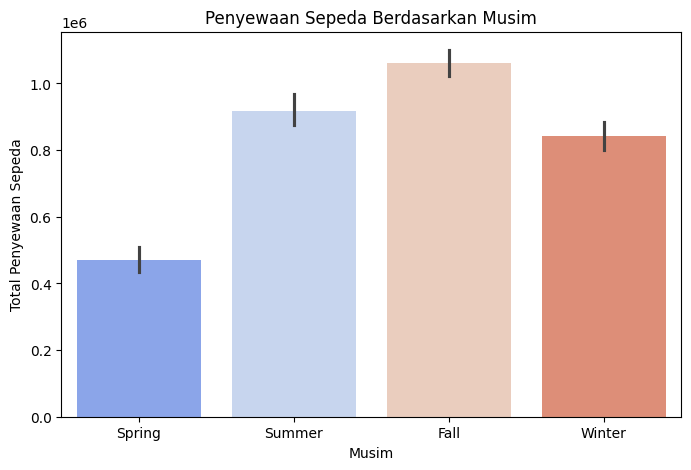

In [31]:
plt.figure(figsize=(8, 5))
sns.barplot(x=day_df["season"], y=day_df["cnt"], palette="coolwarm", estimator=sum)
plt.title("Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Total Penyewaan Sepeda")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.show()

### Pertanyaan 2: Pada jam berapa penyewaan sepeda paling tinggi dan paling rendah dalam sehari?

<ipython-input-41-7ac326dfde92>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=hour_df["hr"], y=hour_df["cnt"], ci=None, marker="o", color="blue")


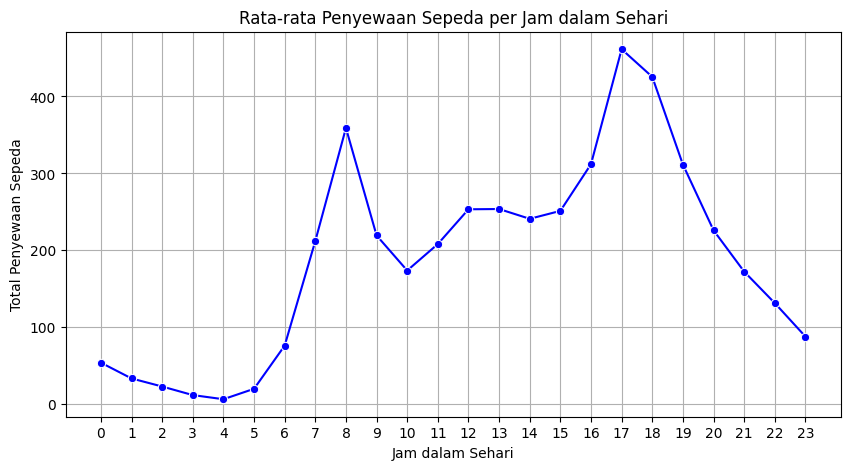

In [41]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=hour_df["hr"], y=hour_df["cnt"], ci=None, marker="o", color="blue")
plt.title("Rata-rata Penyewaan Sepeda per Jam dalam Sehari")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Total Penyewaan Sepeda")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

**Insight:**
- Musim memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda,
- Pola penggunaan sepeda berdasarkan jam menunjukkan dua puncak utama

## Analisis Lanjutan

#### Melihat distribusi cnt untuk menentukan batas pengelompokan manual

In [33]:
cnt_describe = day_df['cnt'].describe()
q1, q3 = cnt_describe['25%'], cnt_describe['75%']

#### Fungsi untuk melakukan pengelompokan manual

In [34]:
def categorize_usage(cnt):
    if cnt < q1:
        return 'Low Usage'
    elif cnt > q3:
        return 'High Usage'
    else:
        return 'Medium Usage'

#### Menambahkan kolom baru dengan kategori penggunaan sepeda

In [35]:
day_df['usage_category'] = day_df['cnt'].apply(categorize_usage)

In [36]:
day_df[['cnt', 'usage_category']].head()

,cnt,usage_category
0,985,Low Usage
1,801,Low Usage
2,1349,Low Usage
3,1562,Low Usage
4,1600,Low Usage


#### Distribusi Penggunaan Sepeda Berdasarkan Kategori

<ipython-input-37-3db8094e861e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='usage_category', data=day_df, palette='coolwarm')


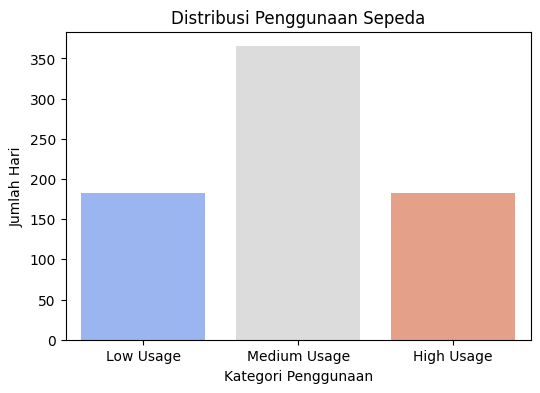

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(x='usage_category', data=day_df, palette='coolwarm')
plt.title('Distribusi Penggunaan Sepeda')
plt.xlabel('Kategori Penggunaan')
plt.ylabel('Jumlah Hari')
plt.show()

#### pengaruh cuaca terhadap kategori penggunaan

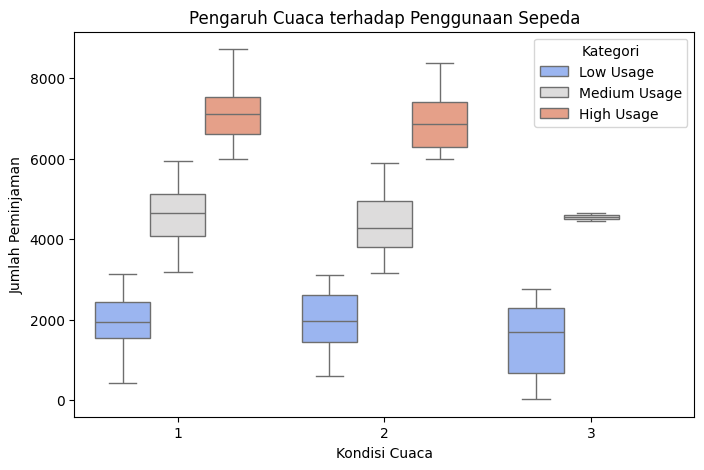

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(x='weathersit', y='cnt', data=day_df, hue='usage_category', palette='coolwarm')
plt.title('Pengaruh Cuaca terhadap Penggunaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.legend(title="Kategori")
plt.show()


## Conclusion

- Musim memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda, di mana musim gugur (Fall) memiliki jumlah penyewaan tertinggi, sedangkan musim dingin (Winter) memiliki jumlah terendah. Hal ini menunjukkan bahwa cuaca yang lebih hangat dan stabil di musim gugur mendorong lebih banyak orang untuk menggunakan sepeda, sementara kondisi dingin di musim dingin mengurangi minat penyewaan.
- Penyewaan sepeda paling ramai terjadi pada jam 07:00 - 09:00 pagi dan 17:00 - 19:00 sore, yang bertepatan dengan jam sibuk orang berangkat dan pulang kerja/sekolah, sedangkan penyewaan paling sepi terjadi pada dini hari (00:00 - 05:00) karena minimnya aktivitas di waktu tersebut.